<h1 style="text-align:center">Ch4.2 Linear Regression of Indicator Matrix K=3 / Masking<h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import interpolate

In [2]:
def find_Beta_hat_IM(X,Y):
    return np.linalg.pinv(X) * Y

def find_Y_hat(X, Beta):
    return X * Beta

def find_G_hat(y_hat):
    return np.argmax(y_hat, axis=1)

### 2-1. For the ternary classification
with $N=100$ observations and $K=3$ classes, 

In [3]:
feature = 2
np.random.seed(15)
x1 = np.random.normal(loc=0.8,scale=0.1,size=(40,feature)) # loc=mean, scale=std

x2_x = np.random.normal(1.5, 0.1, size=(30,1)) 
x2_y = np.random.normal(1.5, 0.2, size=(30,1))
x2 = np.column_stack([x2_x,x2_y])

x3 = np.random.normal(2,0.15, size=(30,feature))

X = np.vstack((x1,x2,x3))
X_add_1 = sm.add_constant(X)

The $(N \times K)$ indicator response matrix $\mathbf{Y}$:
$$\mathbf{Y} = 
\begin{pmatrix}
1 & 0 & 0 \\ 1 & 0 & 0 \\ &\vdots& \\ 0 & 1 & 0 \\ &\vdots& \\ 0 & 0 & 1 \\ 0 & 0 & 1
\end{pmatrix}
$$

In [4]:
Y1 = np.matrix([1,0,0]) #: cat
Y2 = np.matrix([0,1,0]) #: dog
Y3 = np.matrix([0,0,1]) #: rabbit
Yup = np.tile(Y1, (40,1))
Ymid = np.tile(Y2, (30,1))
Ydown = np.tile(Y3, (30,1))

Y = np.vstack((Yup, Ymid, Ydown))
Y.shape

(100, 3)

#### From the linear regression, find the intercept and coefficients

In [5]:
Beta_hat_IM = find_Beta_hat_IM(X_add_1,Y)
Beta_hat_IM

matrix([[ 1.63093699,  0.04855645, -0.67949344],
        [-0.65623588,  0.23934348,  0.4168924 ],
        [-0.2479412 , -0.05402138,  0.30196257]])

### 2-2. Classify data 

In [6]:
new_x = np.random.normal(1.7,2,2)
new_x_add_1 = np.insert(new_x, 0, 1)
new_x_add_1 = np.matrix(new_x_add_1)
new_x_add_1

matrix([[1.        , 1.99038368, 0.45389678]])

In [7]:
Y_hat_IM = find_Y_hat(new_x_add_1, Beta_hat_IM)
Y_hat_IM

matrix([[0.2122361 , 0.50042167, 0.28734223]])

In [8]:
G_hat_IM = find_G_hat(Y_hat_IM)
print(G_hat_IM)
if G_hat_IM == np.matrix([0]):
    print("Cat!")
elif G_hat_IM == np.matrix([1]):
    print("Dog!")
else:
    print("Rabbit!")

[[1]]
Dog!


## 3. Plotting

In [9]:
x11_IM = x1[:,0]
x12_IM = x1[:,1]
x21_IM = x2[:,0]
x22_IM = x2[:,1]
x31_IM = x3[:,0]
x32_IM = x3[:,1]

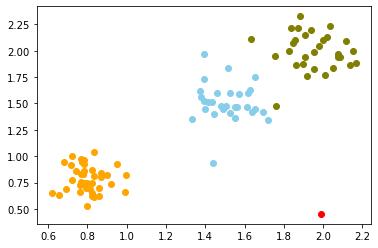

In [10]:
plt.scatter(x11_IM, x12_IM, color="orange")
plt.scatter(x21_IM, x22_IM, color="skyblue")
plt.scatter(x31_IM, x32_IM, color="olive")
plt.scatter(new_x[0],new_x[1], color="red")

### 3-1. Decision Boundary

In [11]:
Beta_hat_IM

matrix([[ 1.63093699,  0.04855645, -0.67949344],
        [-0.65623588,  0.23934348,  0.4168924 ],
        [-0.2479412 , -0.05402138,  0.30196257]])

In [12]:
itc_1 = Beta_hat_IM[0,0]
itc_2 = Beta_hat_IM[0,1]
itc_3 = Beta_hat_IM[0,2]

itc12 = itc_1-itc_2
itc23 = itc_2-itc_3
itc31 = itc_3-itc_1

print(itc12, itc23, itc31)

1.5823805352830072 0.7280498920998437 -2.310430427382851


In [13]:
coeff_1 = Beta_hat_IM[1:3,0]
coeff_2 = Beta_hat_IM[1:3,1]
coeff_3 = Beta_hat_IM[1:3,2]

B12_1 = (coeff_1 - coeff_2)[0,0]
B12_2 = (coeff_1 - coeff_2)[1,0] 
B23_1 = (coeff_2 - coeff_3)[0,0]
B23_2 = (coeff_2 - coeff_3)[1,0]
B31_1 = (coeff_3 - coeff_1)[0,0]
B31_2 = (coeff_3 - coeff_1)[1,0]
(coeff_1 - coeff_2)[0,0] 

-0.8955793536673186

In [14]:
def find_boundary(itc ,x , B1, B2):
    return - (itc * np.ones(len(x)) + x * B1 ) / B2

In [15]:
X1 = X[:,0]
B12 = np.asarray(find_boundary(itc12, X1, B12_1, B12_2)).ravel()
B23 = np.asarray(find_boundary(itc23, X1, B23_1, B23_2)).ravel()
B31 = np.asarray(find_boundary(itc31, X1, B31_1, B31_2)).ravel()

#Interpolation

Y1 = interpolate.interp1d(X1, B12)
Y2 = interpolate.interp1d(X1, B23)
Y3 = interpolate.interp1d(X1, B31)
domain = np.linspace(0.62,1.49, num=100, endpoint=True)
domain2 = np.linspace(1.49, 2.1, num=100, endpoint=True)

In [16]:
for i in range(100):
    if abs(B12[i] - B31[i]) < 0.01:
        print(B12[i])

1.3186357375482856


(0.0, 3.5)

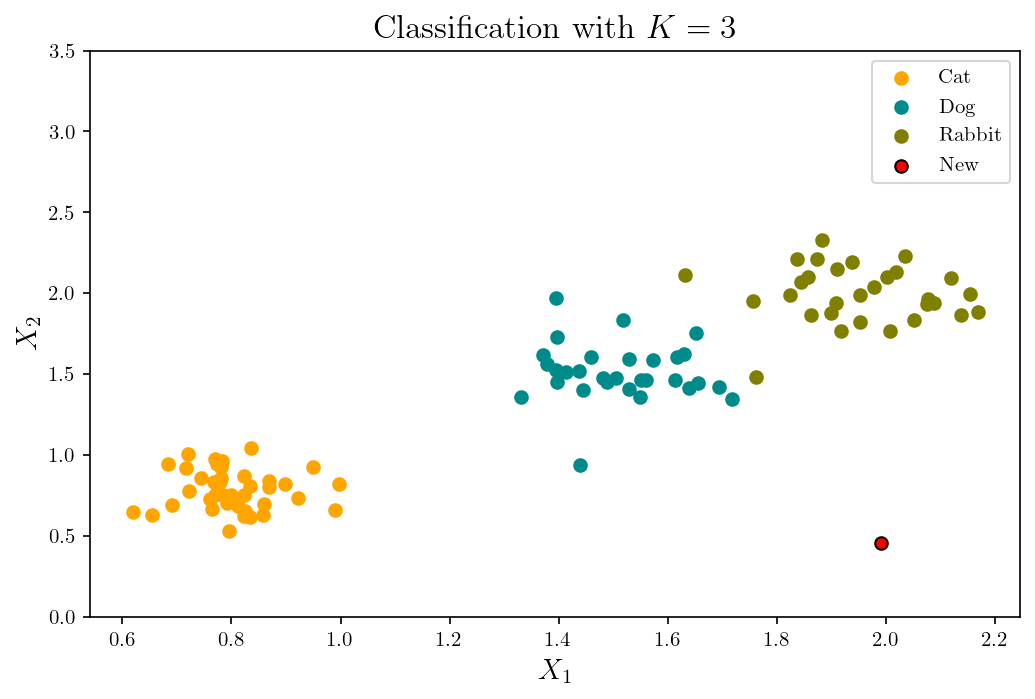

In [17]:
# Use latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Prepare Plot
plt.figure(figsize=(8,5), dpi=150)
plt.title(r"Classification with $K=3$", fontsize=16)
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14)

# Data set
plt.scatter(x11_IM, x12_IM, color="orange", label="Cat")
plt.scatter(x21_IM, x22_IM, color="darkcyan", label="Dog")
plt.scatter(x31_IM, x32_IM, color="olive", label="Rabbit")
plt.scatter(new_x[0],new_x[1], color="red", edgecolors="black", label="New")

plt.legend()
plt.ylim([0,3.5])

In [18]:
beta_hat = find_Beta_hat_IM(X_add_1, Y)

In [19]:
y_hat = find_Y_hat(X_add_1, beta_hat)

In [20]:
G_hat_IM = find_G_hat(y_hat)

In [21]:
idx1 = [i for i in range(100) if (G_hat_IM == 0)[i,0]]
idx2 = [i for i in range(100) if (G_hat_IM == 1)[i,0]]
idx3 = [i for i in range(100) if (G_hat_IM == 2)[i,0]]

In [22]:
new_x_1 = X[idx1]
new_x_2 = X[idx2]
new_x_3 = X[idx3]

(0.0, 3.5)

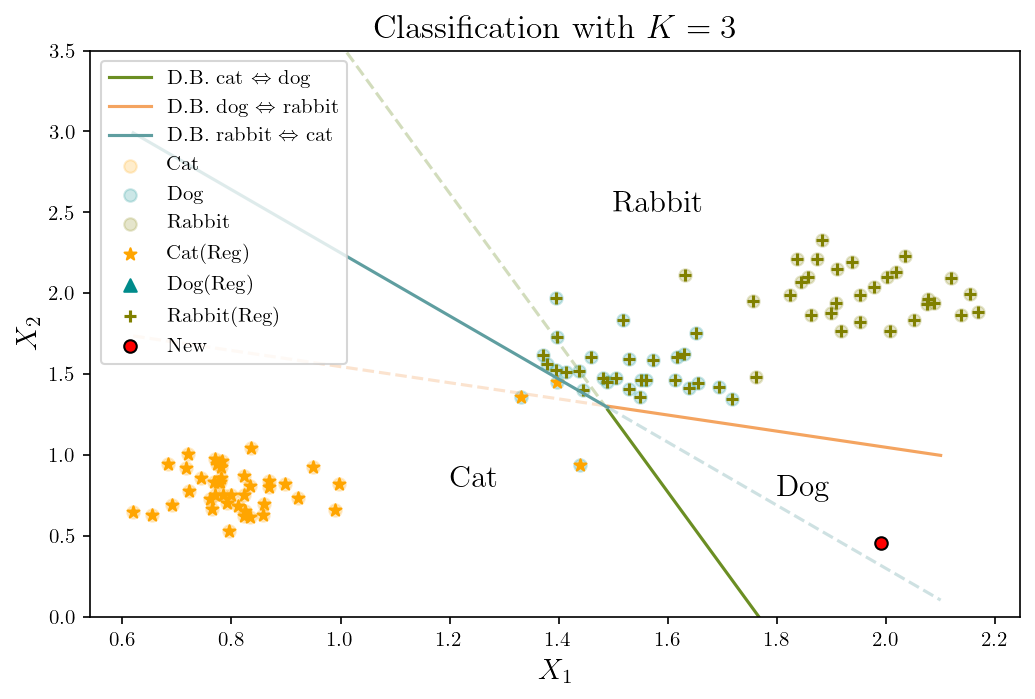

In [24]:
# Use latex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Prepare Plot
plt.figure(figsize=(8,5), dpi=150)
plt.title(r"Classification with $K=3$", fontsize=16)
plt.xlabel(r'$X_1$', fontsize=14)
plt.ylabel(r'$X_2$', fontsize=14)

# Data set
plt.scatter(x11_IM, x12_IM, color="orange", label="Cat", alpha=0.2)
plt.scatter(x21_IM, x22_IM, color="darkcyan", label="Dog", alpha=0.2)
plt.scatter(x31_IM, x32_IM, color="olive", label="Rabbit", alpha=0.2)

plt.scatter(new_x_1[:,0], new_x_1[:,1], color="orange", marker="*",label="Cat(Reg)")
plt.scatter(new_x_2[:,0], new_x_2[:,1],  color="darkcyan", marker="^",label="Dog(Reg)")
plt.scatter(new_x_3[:,0], new_x_3[:,1], color="olive", marker="+",label="Rabbit(Reg)")


plt.scatter(new_x[0],new_x[1], color="red", edgecolors="black", label="New")

# Decision Boundaries
plt.plot(domain2, Y1(domain2), color="olivedrab", label=r"D.B. cat $\Leftrightarrow$ dog")
plt.plot(domain, Y1(domain), color="olivedrab", alpha=0.3, ls="--")

plt.plot(domain2, Y2(domain2), color="sandybrown", label=r"D.B. dog $\Leftrightarrow$ rabbit")
plt.plot(domain, Y2(domain), color="sandybrown", alpha=0.3 ,ls="--")

plt.plot(domain2, Y3(domain2), color="cadetblue", ls="--", alpha=0.3)
plt.plot(domain, Y3(domain), color="cadetblue",label="D.B. rabbit $\Leftrightarrow$ cat")

# Annotation
plt.annotate('Cat', xy=(1.2,0.8), fontsize=15)
plt.annotate('Dog', xy=(1.8,0.75), fontsize=15)
plt.annotate('Rabbit', xy=(1.5,2.5), fontsize=15)

plt.legend(loc="upper left")
plt.ylim([0,3.5])